In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(neurons):
    labels = list(string.ascii_lowercase)
    colors = ['mediumseagreen', 'crimson', 'cornflowerblue']
    plt.figure(figsize=(10, 4))
    for neuron in neurons:
        plt.plot(neuron.history, label=labels.pop(0), color=colors.pop(0))
    plt.xlabel('time')
    plt.ylabel('potential')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

In [3]:
class Neuron:
    def __init__(self):
        self.t = 0 # threshold potential
        self.p = -10 # resting potential
        self.min_p = -20 # minimum potential
        self.a = False # action potential
        self.history = []
    def update(self, s):
        if self.p < self.t:
            self.p += s # graded potential
            self.p = max(self.min_p, min(self.p, self.t))
            self.a = False
        elif self.p == self.t:
            self.p += 80 # depolarization
            self.a = True
        elif self.p > self.t:
            self.p -= 30 # repolarization
        self.history.append(self.p)

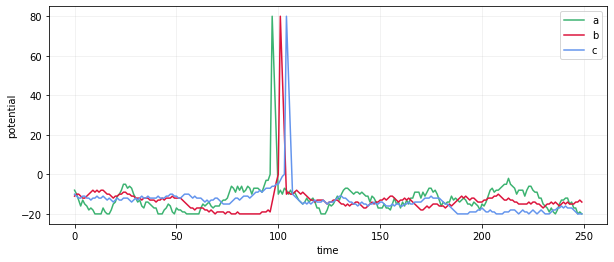

In [4]:
# coupling

neuron_a = Neuron()
neuron_b = Neuron()
neuron_c = Neuron()

for t in range(250):
    
    s = np.random.randint(-3, 4)
    neuron_a.update(s)
    
    s = 5 if neuron_a.a else np.random.randint(-1, 2)
    neuron_b.update(s)
    
    s = 2 if neuron_b.a else np.random.randint(-1, 2)
    neuron_c.update(s)
    
plot([neuron_a, neuron_b, neuron_c])

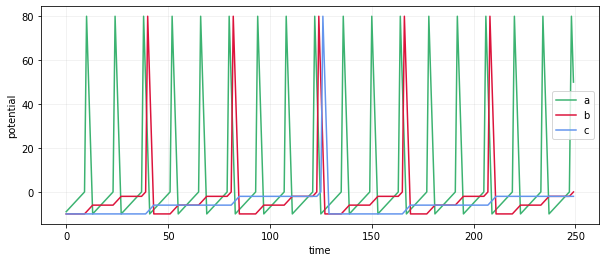

In [5]:
# dampening

neuron_a = Neuron()
neuron_b = Neuron()
neuron_c = Neuron()

for t in range(250):
    s = 1
    neuron_a.update(s)
    
    s = 1 if neuron_a.a else 0
    neuron_b.update(s)
    
    s = 1 if neuron_b.a else 0
    neuron_c.update(s)
    
plot([neuron_a, neuron_b, neuron_c])

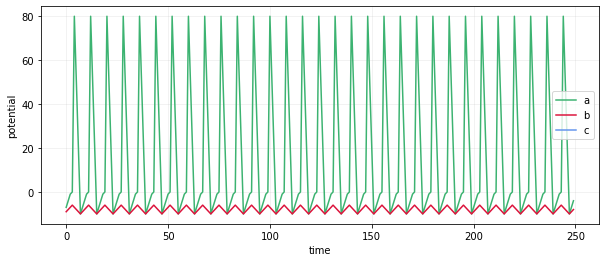

In [6]:
# not

neuron_a = Neuron()
neuron_b = Neuron()
neuron_c = Neuron()

for t in range(250):
    s = 3 # switch at 3
    neuron_a.update(s)
    
    s = -1 if neuron_a.a else 1
    neuron_b.update(s)
    
plot([neuron_a, neuron_b, neuron_c])

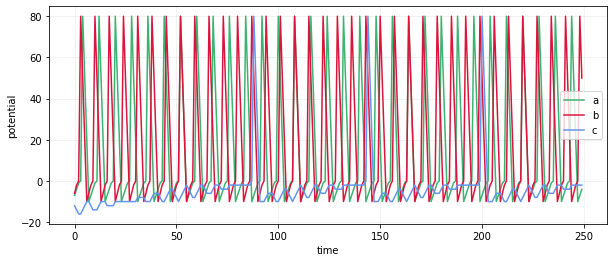

In [7]:
# and

neuron_a = Neuron()
neuron_b = Neuron()
neuron_c = Neuron()

for t in range(250):
    s = 3
    neuron_a.update(s)
    
    s = 4
    neuron_b.update(s)
    
    s = 1 if neuron_a.a else -1
    s += 1 if neuron_b.a else -1
    neuron_c.update(s)
    
plot([neuron_a, neuron_b, neuron_c])